In [1]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
SongDF = pd.read_csv('song_data.csv')
SongDF = SongDF.drop('song_name',axis = 1)
SongDF

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  
0      167.060               4          0.474  
1      105.256               4          0.370  
2      123.881               4          0.324  
3      122.444               4          0.198  
4      172.011               4          0.574  
...        ...             ...            ...  
18830  113.969               4          0.300  
18831   94.286               4          0.265  
18832  130.534               4          0.286  
18833  106.063               4          0.323  
18834   91.490               4          0.581  

[18835 rows x 14 columns]

In [2]:

SongDF = SongDF.dropna()
SongDF = SongDF.drop_duplicates()
df1 = SongDF[['song_duration_ms','key','audio_mode','time_signature']]
SongDF = SongDF[['song_popularity','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','audio_valence','loudness']].round(3)
SongDF = pd.merge(SongDF,df1,left_index=True,right_index=True)

In [3]:
SongDF

song_popularity  acousticness  danceability  energy  instrumentalness  \
0                   73         0.006         0.496   0.682             0.000   
1                   66         0.010         0.542   0.853             0.000   
2                   76         0.008         0.737   0.463             0.447   
3                   74         0.026         0.451   0.970             0.004   
4                   56         0.001         0.447   0.766             0.000   
...                ...           ...           ...     ...               ...   
18830               60         0.893         0.500   0.151             0.000   
18831               60         0.765         0.495   0.161             0.000   
18832               23         0.847         0.719   0.325             0.000   
18833               55         0.945         0.488   0.326             0.016   
18834               60         0.911         0.640   0.381             0.000   

       liveness  speechiness    tempo  audio_valence  loudness  \
0         0.059        0.029  167.060          0.474    -4.095   
1         0.108        0.050  105.256          0.370    -6.407   
2         0.255        0.079  123.881          0.324    -7.828   
3         0.102        0.107  122.444          0.198    -4.938   
4         0.113        0.031  172.011          0.574    -5.065   
...         ...          ...      ...            ...       ...   
18830     0.111        0.035  113.969          0.300   -16.107   
18831     0.105        0.030   94.286          0.265   -14.078   
18832     0.125        0.036  130.534          0.286   -12.222   
18833     0.119        0.033  106.063          0.323   -12.020   
18834     0.104        0.030   91.490          0.581   -11.790   

       song_duration_ms  key  audio_mode  time_signature  
0                262333    8           1               4  
1                216933    3           0               4  
2                231733    0           1               4  
3                216933    0           1               4  
4                223826   10           1               4  
...                 ...  ...         ...             ...  
18830            159645   11           1               4  
18831            205666   11           0               4  
18832            182211    0           1               4  
18833            352280    3           1               4  
18834            193533    4           1               4  

[14924 rows x 14 columns]

### Numerical Dataset

In [4]:
numericalsongdf = SongDF[['song_popularity','song_duration_ms','acousticness','danceability','energy','instrumentalness','liveness','loudness','tempo','audio_valence']]

In [5]:
numericalsongdf.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     14924.000000      1.492400e+04  14924.000000  14924.000000   
mean         48.749598      2.189494e+05      0.270466      0.624554   
std          20.380083      6.234495e+04      0.298134      0.158052   
min           0.000000      1.200000e+04      0.000000      0.000000   
25%          37.000000      1.839372e+05      0.024000      0.524000   
50%          52.000000      2.118395e+05      0.139000      0.636000   
75%          63.250000      2.447215e+05      0.458250      0.740000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness      liveness      loudness  \
count  14924.000000      14924.000000  14924.000000  14924.000000   
mean       0.639730          0.092063      0.180433     -7.677764   
std        0.221753          0.240471      0.145096      4.018656   
min        0.001000          0.000000      0.011000    -38.768000   
25%        0.496000          0.000000      0.093000     -9.390000   
50%        0.672000          0.000000      0.122000     -6.751000   
75%        0.818000          0.005000      0.224000     -4.991000   
max        0.999000          0.997000      0.986000      1.585000   

              tempo  audio_valence  
count  14924.000000   14924.000000  
mean     121.102567       0.526963  
std       29.042044       0.247772  
min        0.000000       0.000000  
25%       98.120000       0.332000  
50%      120.016000       0.527000  
75%      139.940250       0.728000  
max      242.318000       0.984000

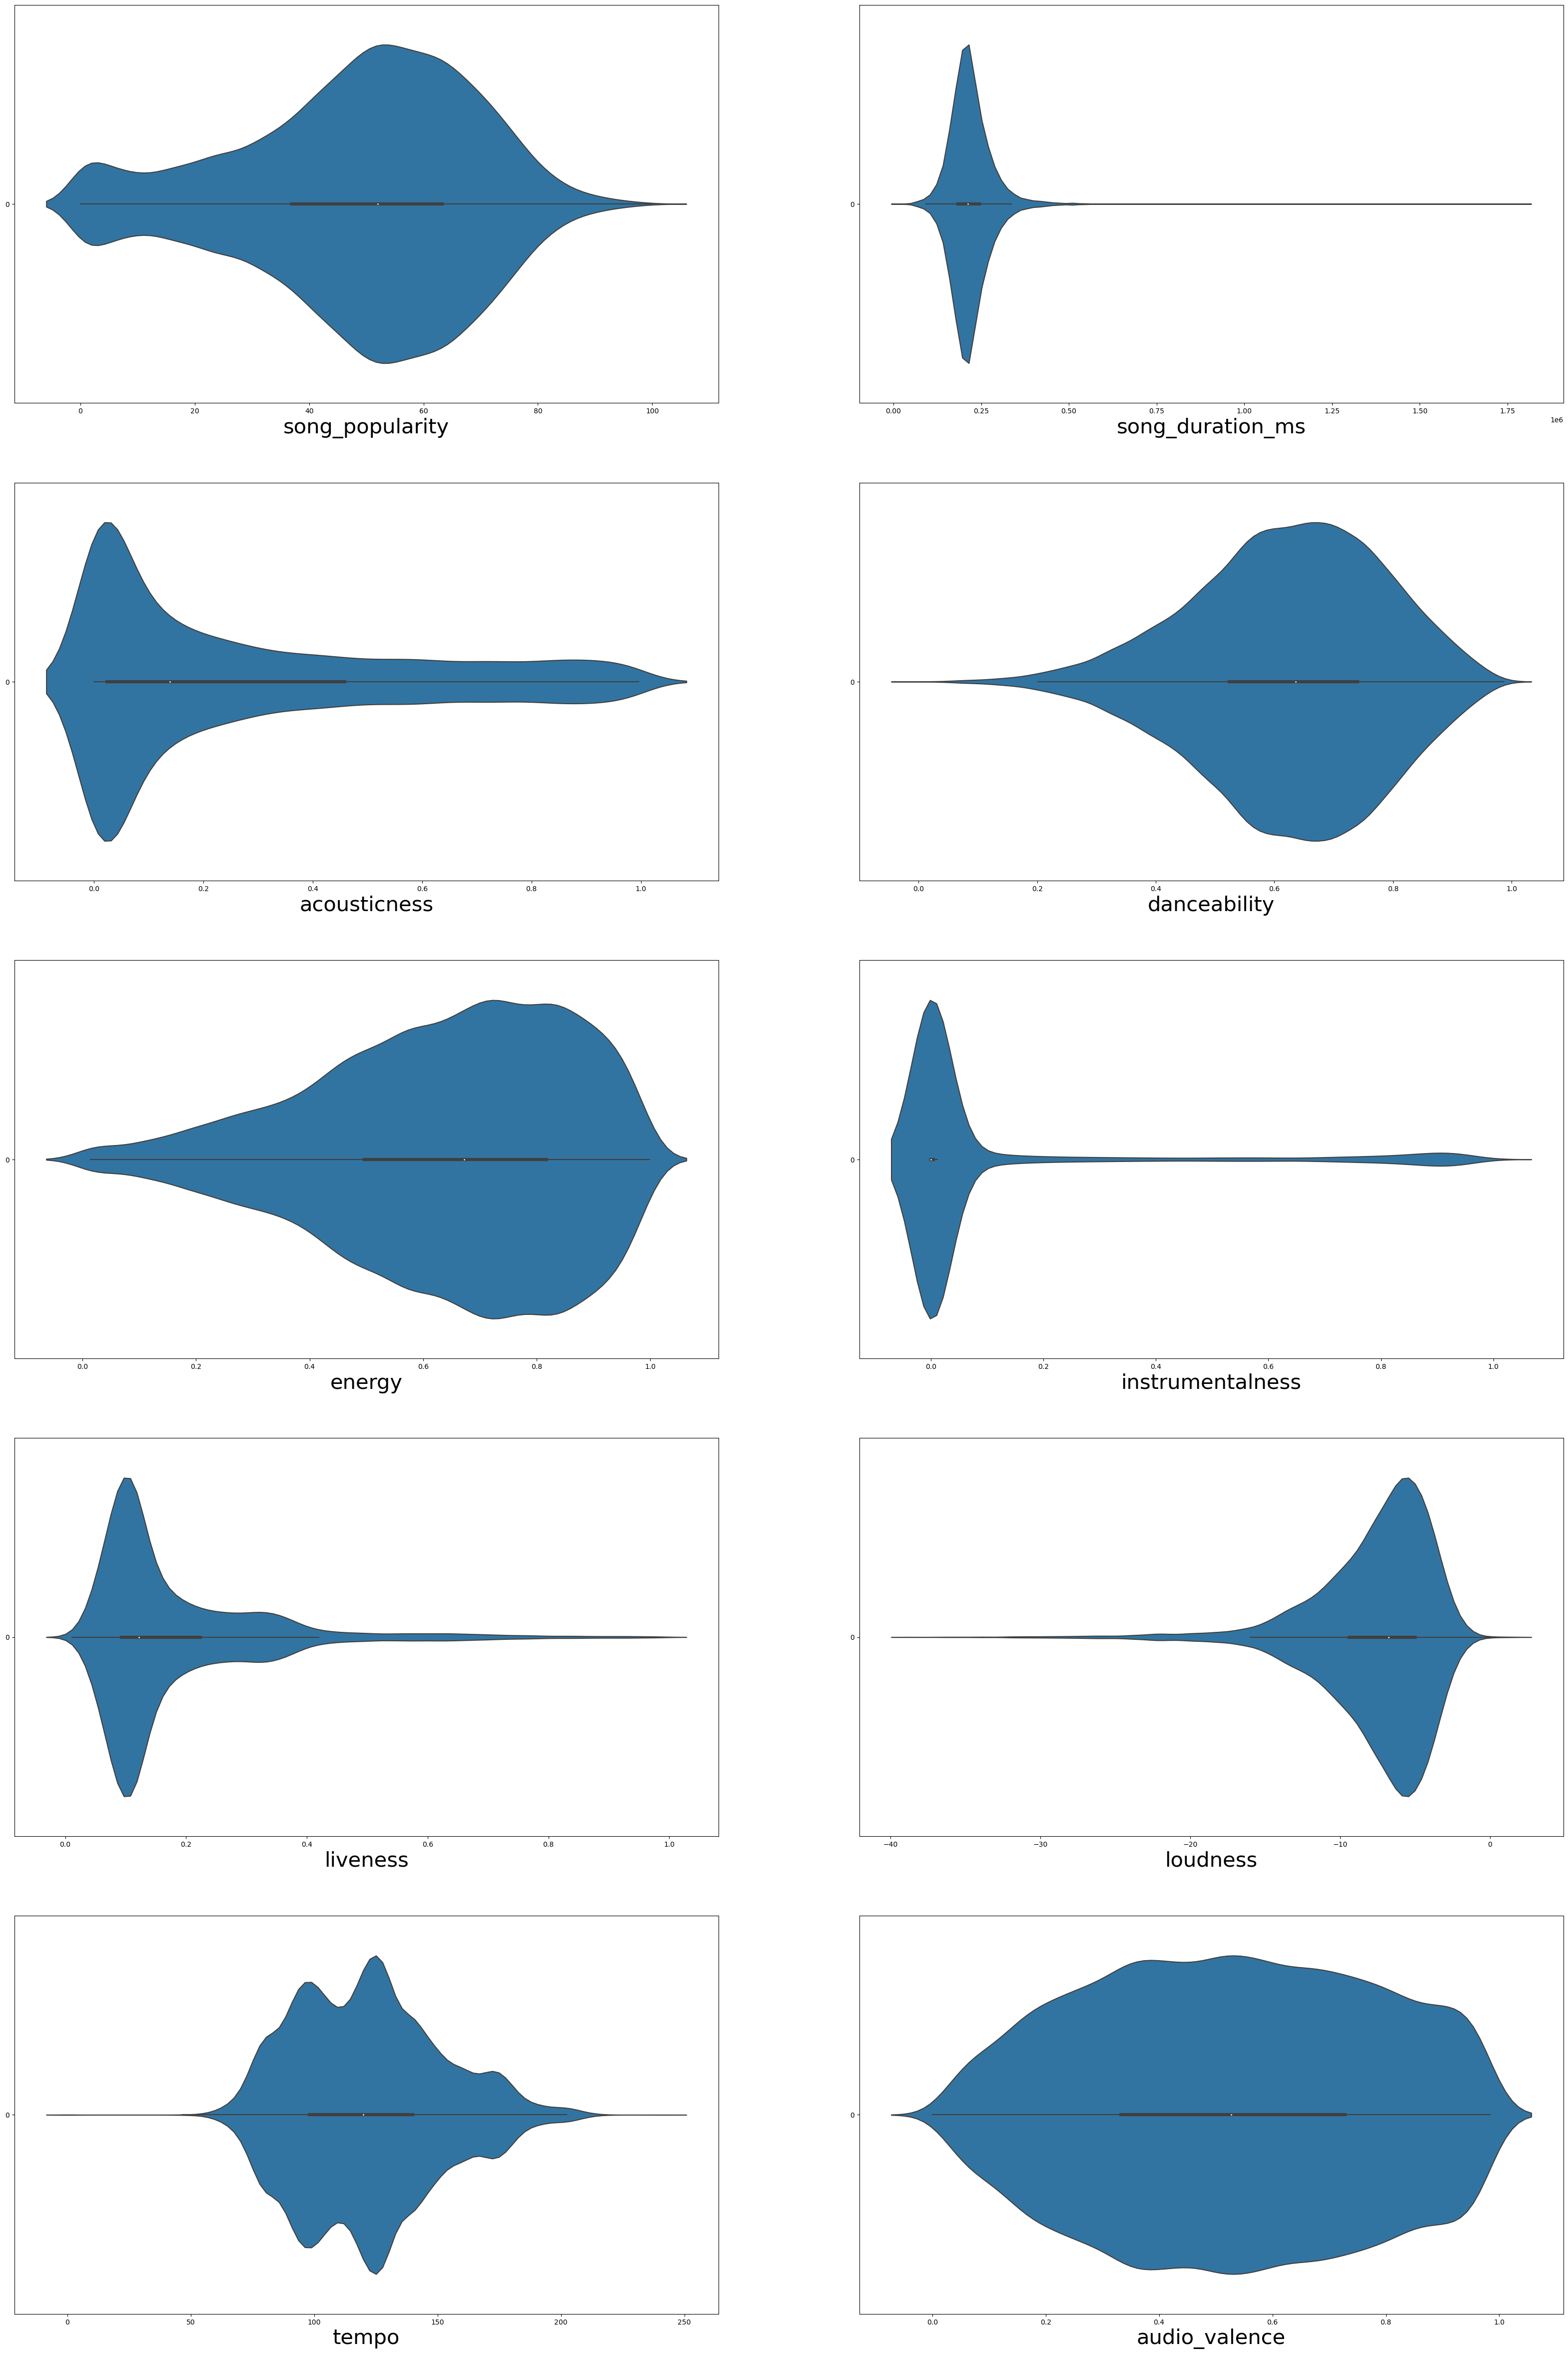

In [6]:
f, axes = plt.subplots(5,2,figsize=(40,60))
count = 0 
row = 0
for var in numericalsongdf.columns :
    if count%2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numericalsongdf[var],orient='h', ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var, fontsize=30)
    count+=1
    if count%2==0:
        row +=1

liveness,acousticness, song duration, instrumentalness are right skewed while loudness is left skewed.


<AxesSubplot:>

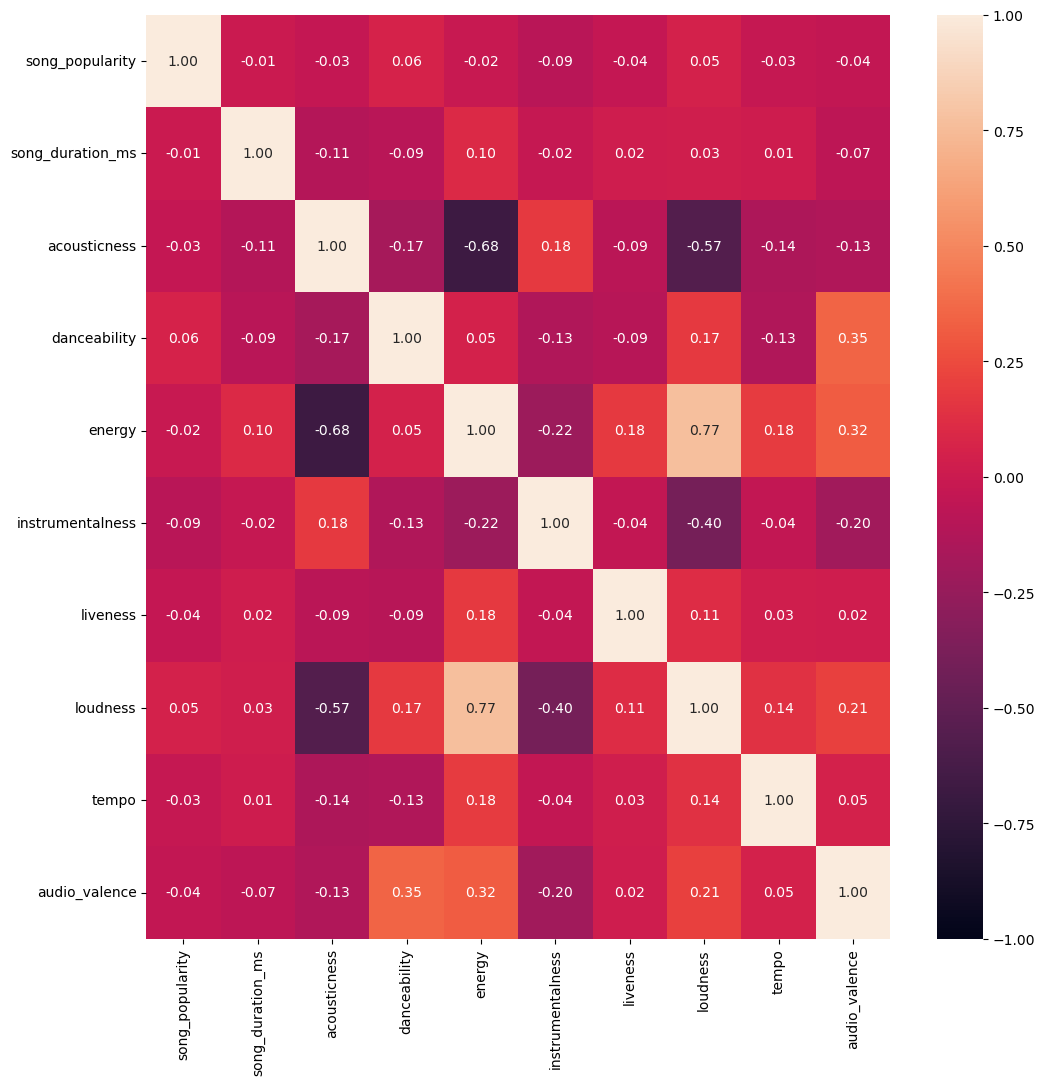

In [7]:
f = plt.figure(figsize=(12,12))
sb.heatmap(numericalsongdf.corr(),vmin = -1, vmax = 1, annot=  True, fmt = '.2f')

### Inferences drawn :
1. The correlation values of most of the pairs of variables are barely above 0.20. 
2. Song popularity doesn't have a good linear correlation with any variable. All correlation values are below 0.1 (very poor).
3. Acousticness and energy are highly negatively correlated with correlation value of -0.68.
4. Acousticness and loundness are highly negatively correlated with correlation value of -0.57.
5. Loudness and energy have a high positive correlation with correlation value of 0.77.

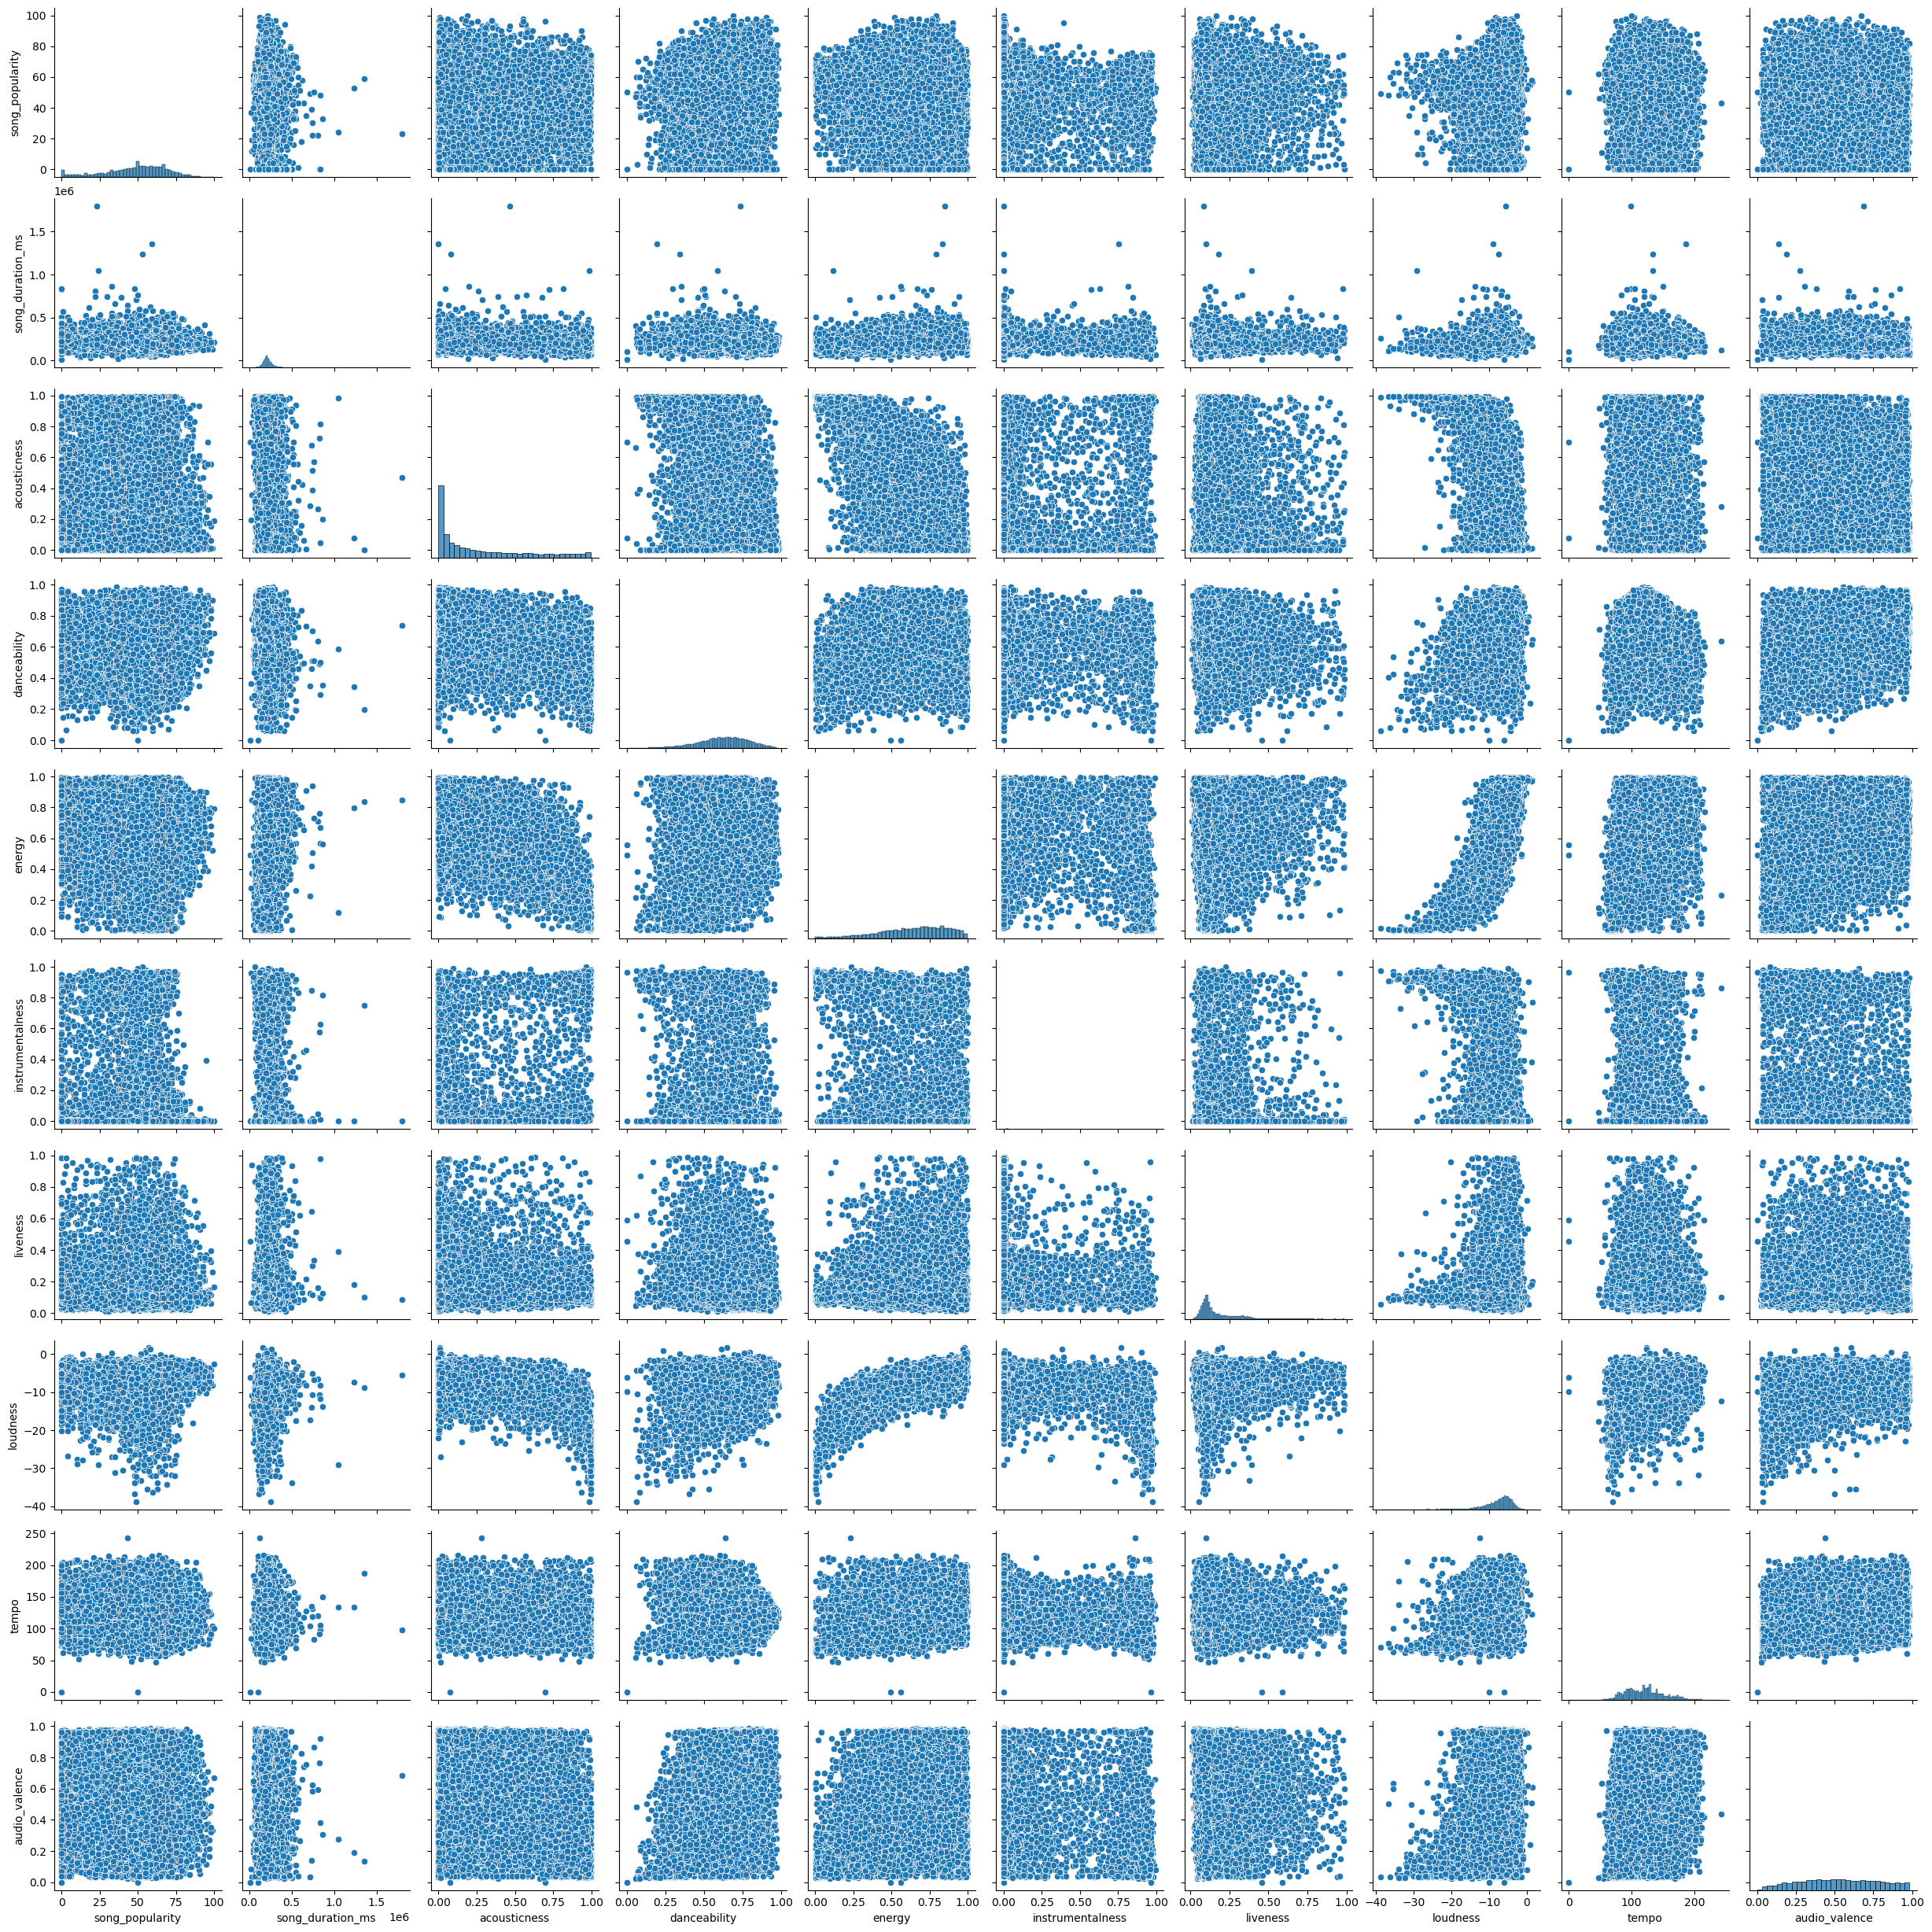

In [8]:
sb.pairplot(data = numericalsongdf)

From the above pairplots, we can see that the data points plotted for song_popularity vs any other variable are distributed all over the place. In other words, there is no specific linear relation between the song_popularity and any other variable.

### Categorical variables VS song_popularity
Categorical variables include key, audio_mode and time_signature 

### Key 

In [9]:
SongDF['key'].value_counts().sort_index()


0     1734
1     1593
2     1399
3      433
4     1083
5     1257
6     1048
7     1654
8     1047
9     1410
10    1045
11    1221
Name: key, dtype: int64

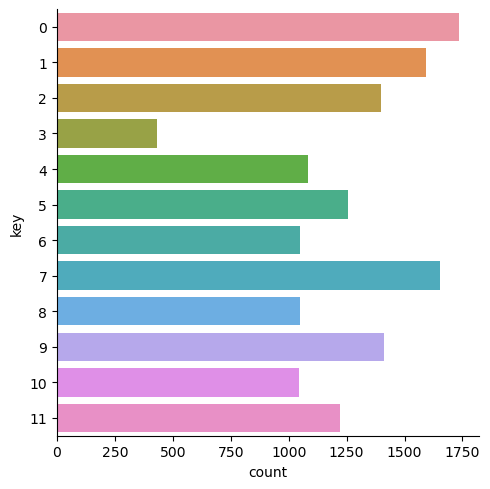

In [10]:
sb.catplot(y = "key", data = SongDF, kind = 'count')

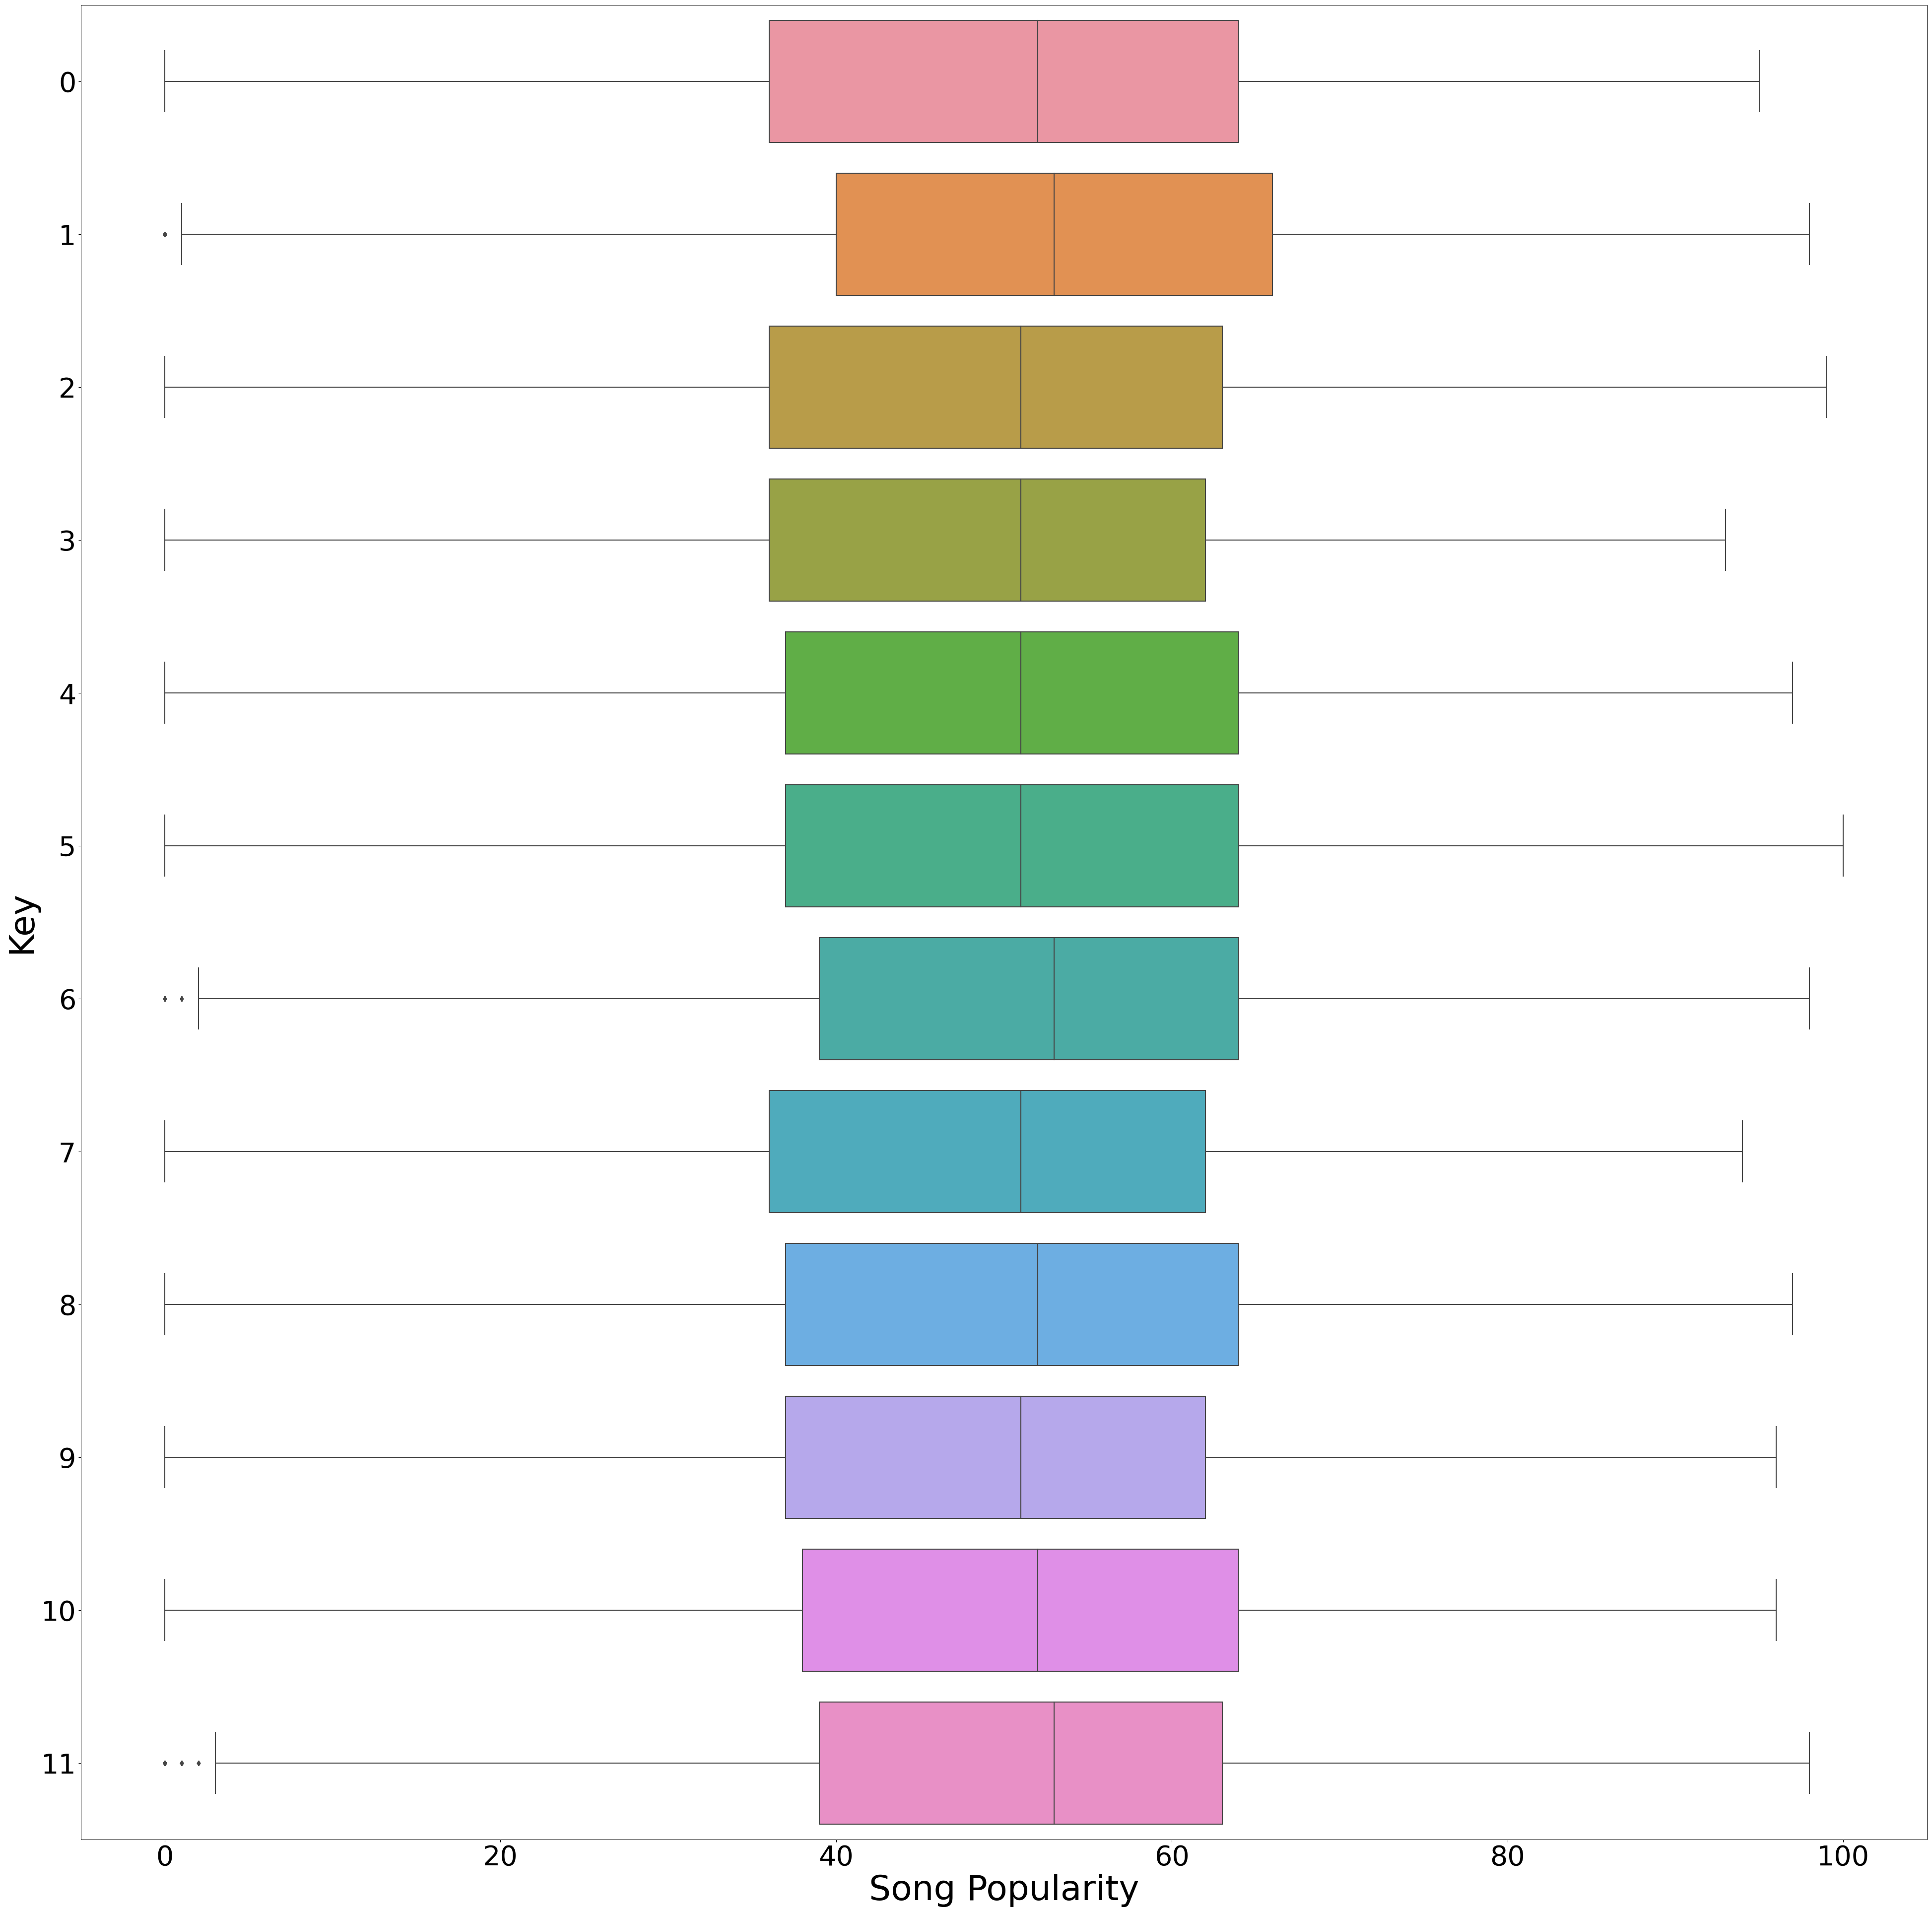

In [11]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "song_popularity", y = "key", data = SongDF, orient = "h")
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Song Popularity",fontsize=50)
ax.set_ylabel("Key",fontsize=50)
plt.show()

### Audio Mode

In [12]:
SongDF['audio_mode'].value_counts().sort_index()


0    5493
1    9431
Name: audio_mode, dtype: int64

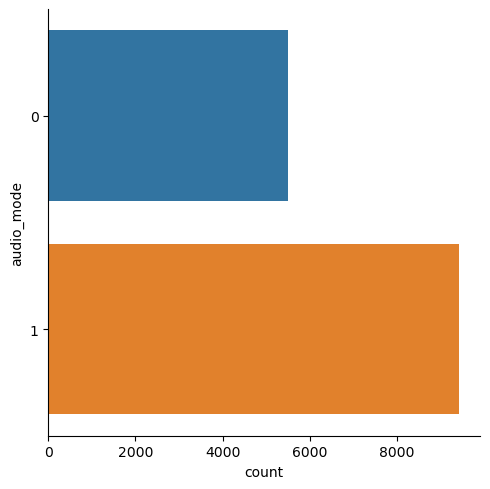

In [13]:
sb.catplot(y = "audio_mode", data = SongDF, kind = 'count')

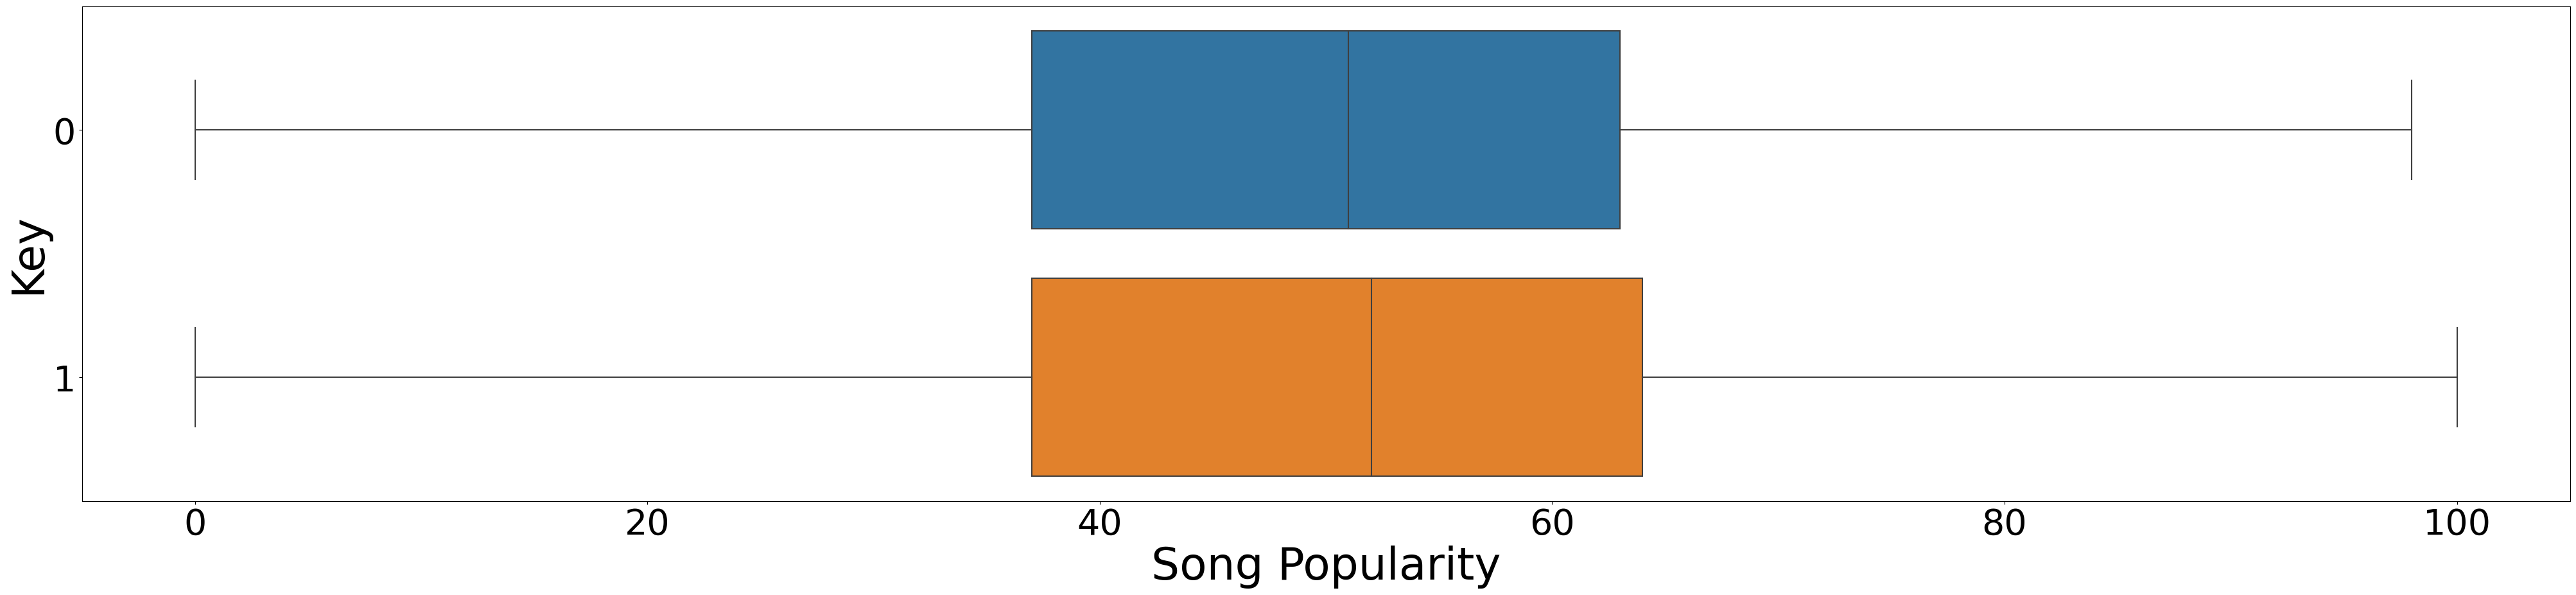

In [14]:
f, ax= plt.subplots(figsize=(50,10))
sb.boxplot(x = "song_popularity", y = "audio_mode", data = SongDF, orient = "h")
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Song Popularity",fontsize=50)
ax.set_ylabel("Key",fontsize=50)
plt.show()

From the category plot we can see that song popularity and key are not related to each other very well.

### Time Signature

In [15]:
SongDF['time_signature'].value_counts().sort_index()

0        3
1       67
3      684
4    13975
5      195
Name: time_signature, dtype: int64

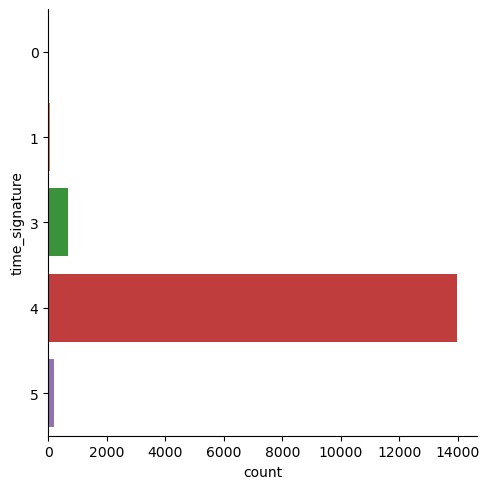

In [16]:
sb.catplot(y = "time_signature", data = SongDF, kind = 'count')

From the graph, we can see that a majority of the songs belong to category 4.

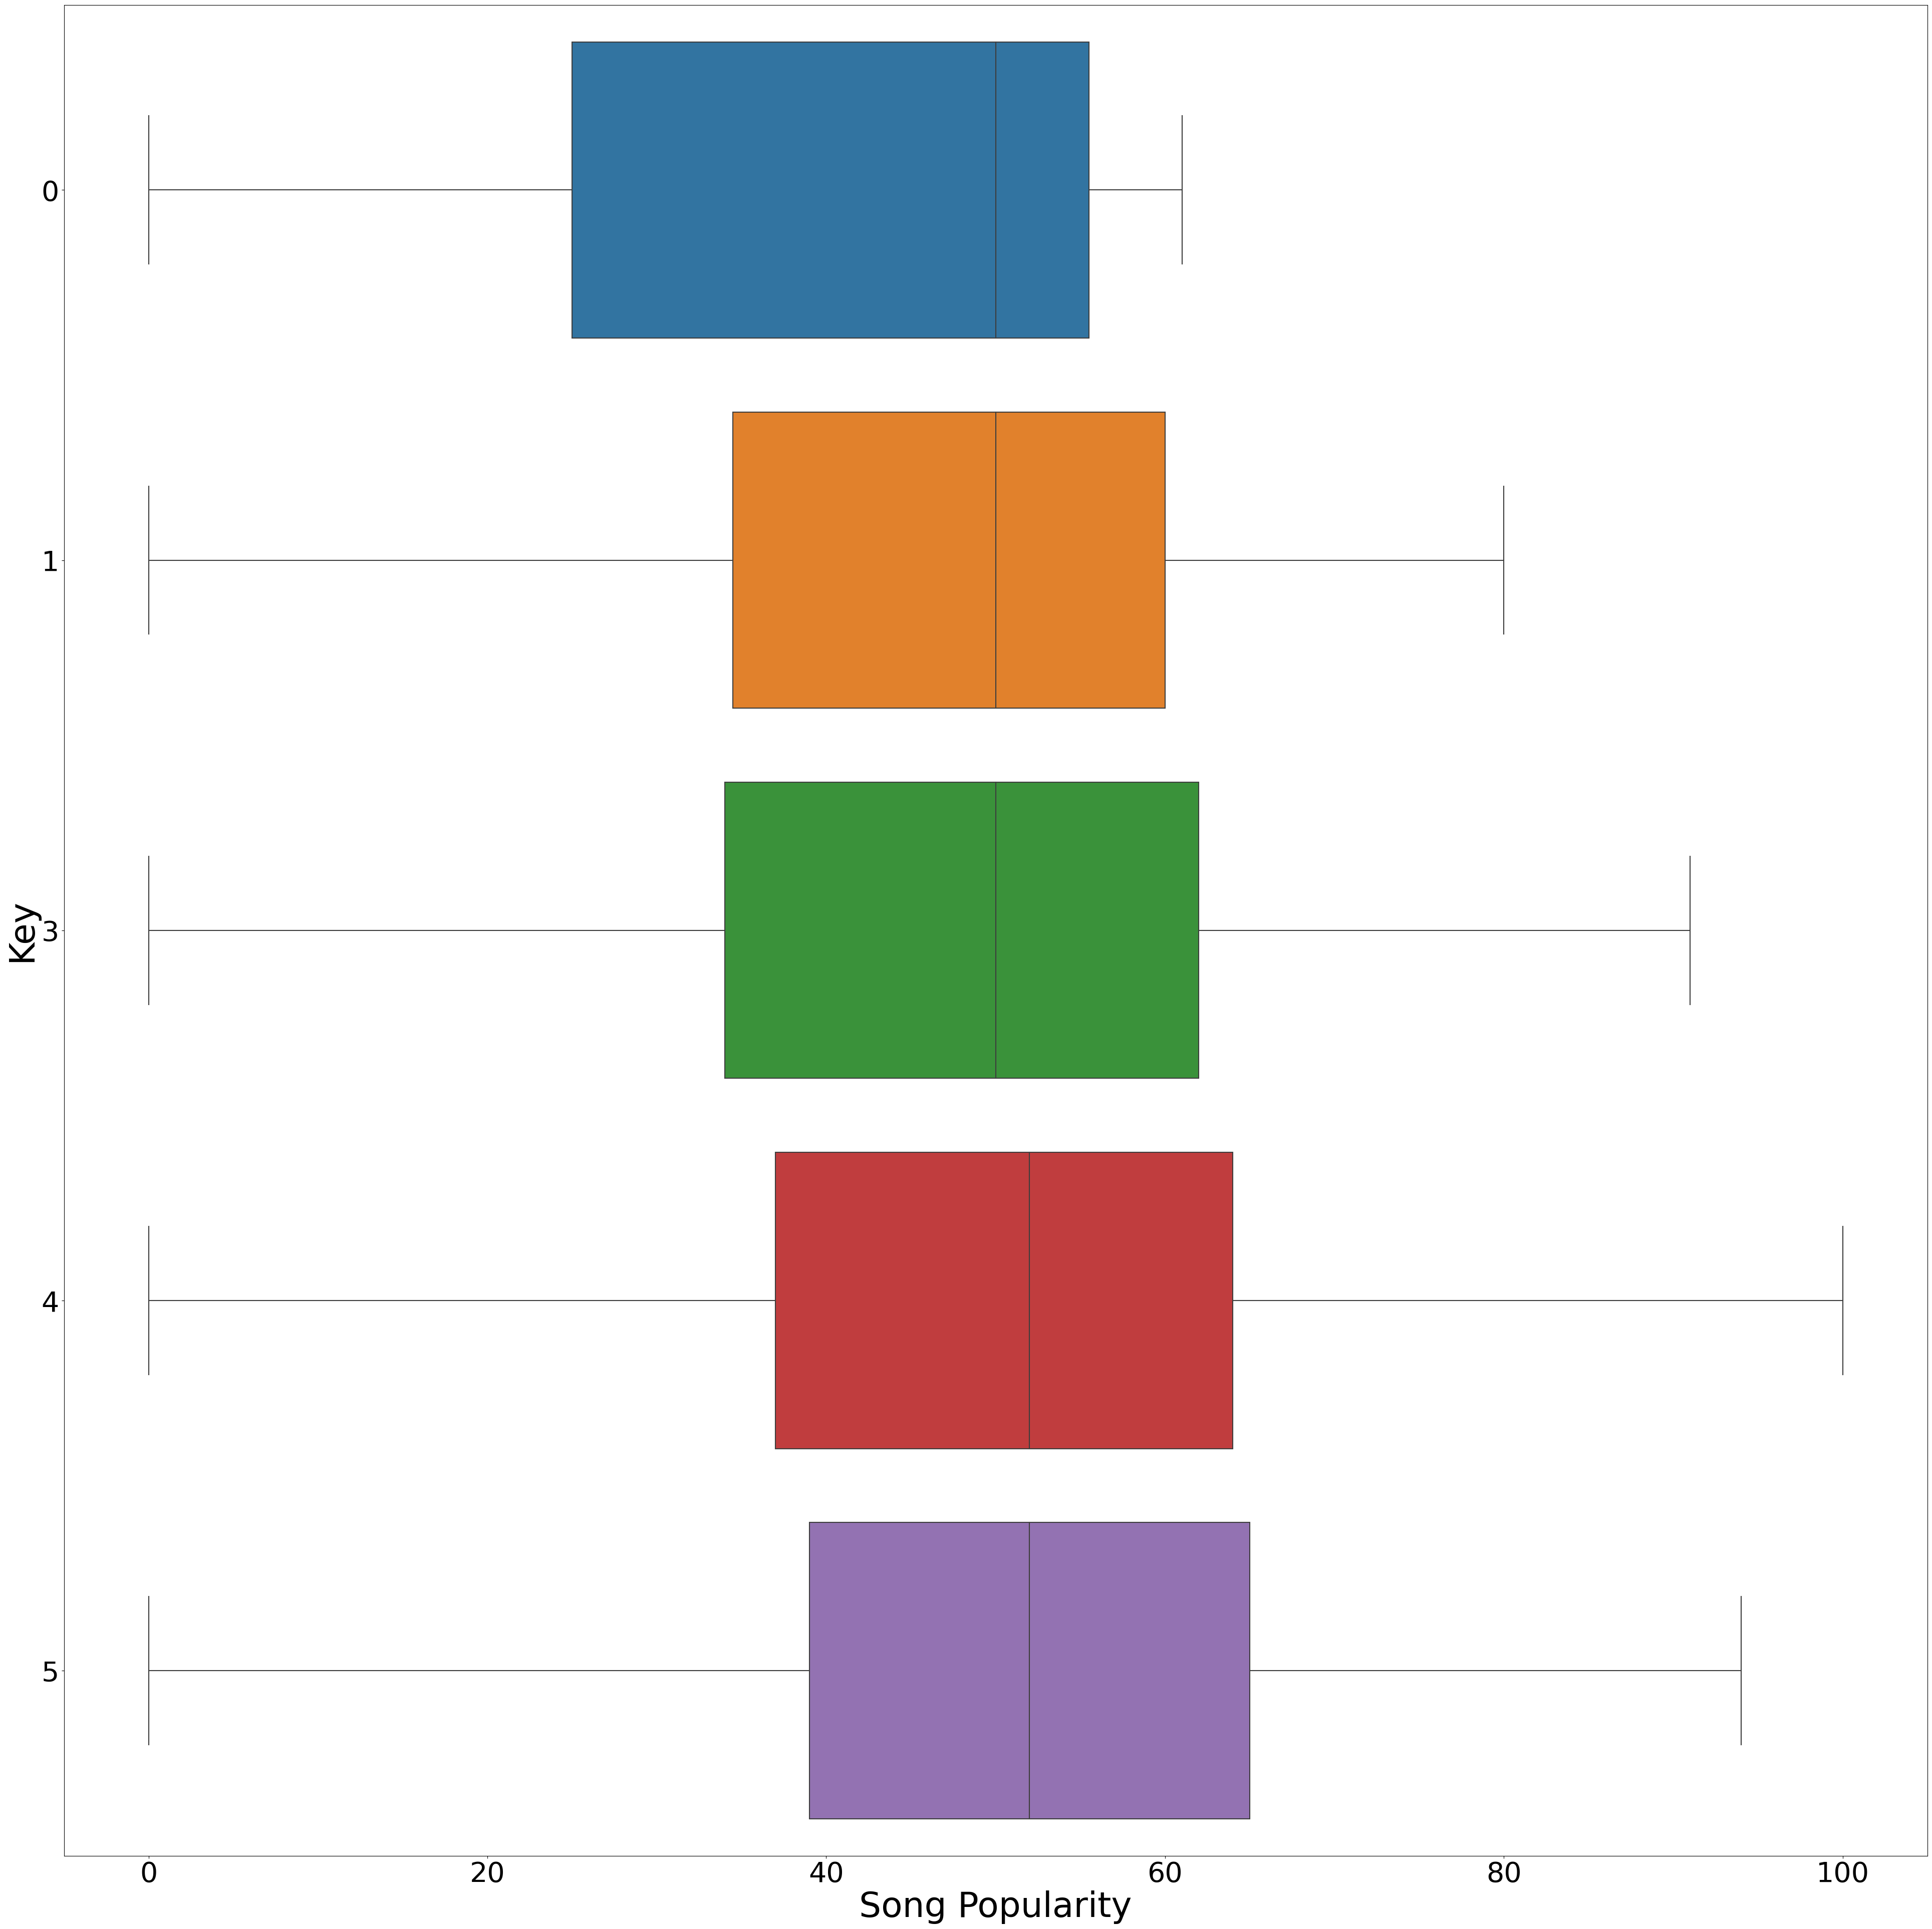

In [17]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "song_popularity", y = "time_signature", data = SongDF, orient = "h")
ax.tick_params(axis='y', labelsize=40)
ax.tick_params(axis='x', labelsize=40)
ax.set_xlabel("Song Popularity",fontsize=50)
ax.set_ylabel("Key",fontsize=50)
plt.show()

From the graph, we can see a slight shift in time signature as song popularity increases